## IMPORTING DATA

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [140]:
from sklearn.datasets import load_boston

In [141]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LassoCV,RidgeCV
from sklearn.model_selection import cross_val_score

In [142]:
df = pd.DataFrame(load_boston()['data'],columns=load_boston()['feature_names'])

In [143]:
df['MEDV'] = load_boston()['target']

In [144]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## DATASET DESCRIPTION

In [145]:
print(load_boston().DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [146]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### There are no missing values in the data available 

## Outliers handling

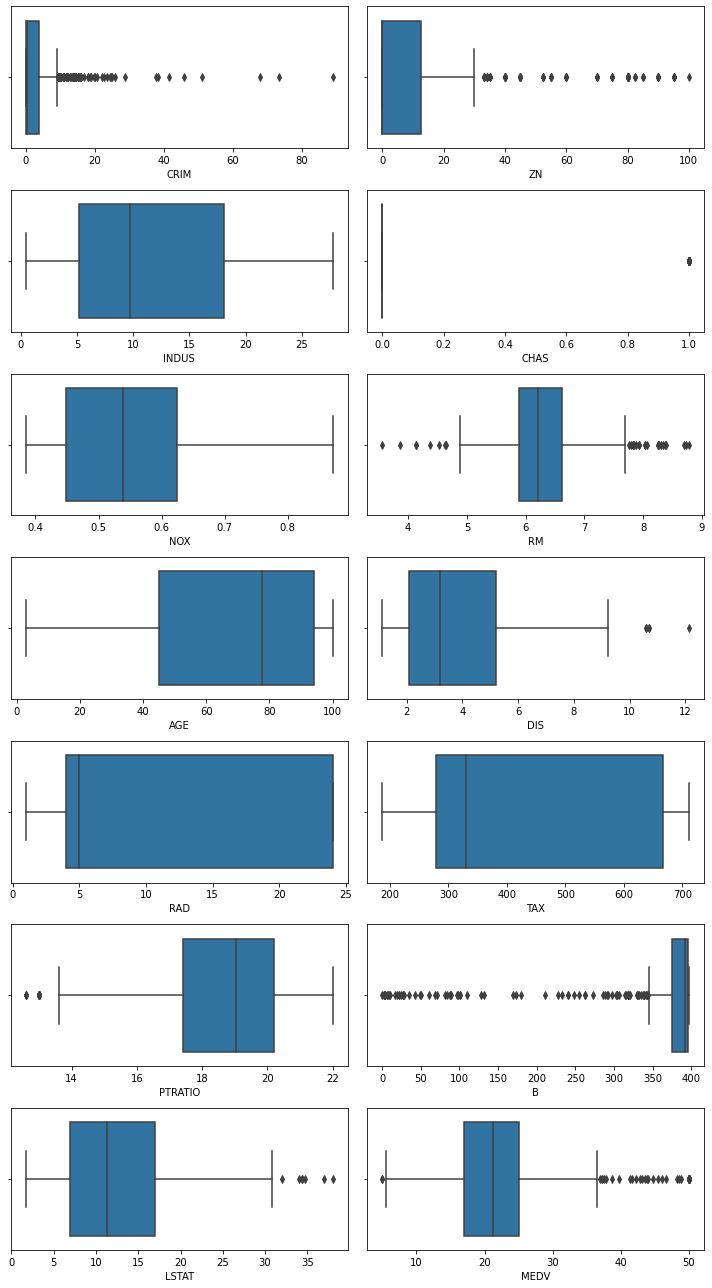

In [147]:
plt.figure(figsize=(10,18))
for i,var in enumerate(df.columns):
    plt.subplot(7,2,i+1)
    sns.boxplot(df[var])
    
plt.tight_layout()

In [148]:
cols = ['ZN','RM', 'PTRATIO', 'LSTAT','DIS']

In [149]:
def removeoutliers(data, col):
    Q1,Q3 = np.percentile(data[col].values,[25,75])
    IQR = Q3 - Q1
    
    whisker1 = Q1 - 1.5*IQR
    whisker2 = Q3 + 1.5*IQR
    
    data[col] = np.where(data[col] > whisker2, whisker2, data[col])
    data[col] = np.where(data[col] < whisker1, whisker1, data[col])


In [150]:
for var in cols:
    removeoutliers(df,var)

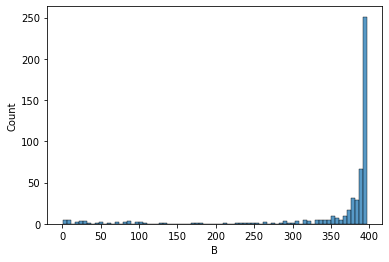

In [151]:
sns.histplot(df['B'])

In [152]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [153]:
X = df.drop("MEDV", axis = 1)
y = df["MEDV"]

In [154]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error ,r2_score , mean_absolute_error

In [155]:
kf = KFold(n_splits=4,shuffle=True,random_state = 42)

In [156]:
ms = StandardScaler()

In [157]:
Xs = ms.fit_transform(X)

In [158]:
def scorer(model,X,y):
    r2scores = []
    maescores = []
    msescores = []
    rmse = []
    scores = pd.DataFrame()
    for train_index,test_index in kf.split(X):
        model.fit(X[train_index],y[train_index])
        y_pred = model.predict(X[test_index])
        y_test = y[test_index]
        r2scores.append(r2_score(y_test,y_pred))
        maescores.append(mean_absolute_error(y_test,y_pred))
        msescores.append(mean_squared_error(y_test,y_pred))
        rmse.append(np.sqrt(mean_squared_error(y_test,y_pred)))
        
    scores['r2_scores'] = r2scores
    scores['MAE_scores'] = maescores
    scores["MSE_scores"] = msescores
    scores['RMSE'] = rmse
        
    return scores

### LinearRegression

In [159]:
linear_regressor = LinearRegression()

In [160]:
scorer(linear_regressor,Xs,y)

,r2_scores,MAE_scores,MSE_scores,RMSE
0,0.689009,3.134386,21.777810,4.666670
1,0.697460,3.763966,27.447955,5.239080
2,0.789897,3.662710,22.654919,4.759718
3,0.676600,3.277022,21.671131,4.655226


### Lasso

In [161]:

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=5e4,
                  cv=3)

In [162]:
scorer(lassoCV,Xs,y)

,r2_scores,MAE_scores,MSE_scores,RMSE
0,0.689031,3.133624,21.776265,4.666505
1,0.697449,3.763713,27.448920,5.239172
2,0.789940,3.662135,22.650274,4.759230
3,0.676651,3.276321,21.667729,4.654861


### Ridge

In [163]:

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]
ridgeCV = RidgeCV(alphas=alphas, cv=4)

In [164]:
scorer(ridgeCV, Xs, y)

,r2_scores,MAE_scores,MSE_scores,RMSE
0,0.686465,3.036904,21.955925,4.685715
1,0.674847,3.648463,29.499544,5.431348
2,0.760849,3.733980,25.787103,5.078100
3,0.676032,3.128767,21.709158,4.659309


In [165]:
## Elastic Net

l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=1e4)


In [166]:
scorer(elasticNetCV,Xs,y)

,r2_scores,MAE_scores,MSE_scores,RMSE
0,0.689022,3.133301,21.776909,4.666574
1,0.697409,3.763340,27.452574,5.239520
2,0.789958,3.661383,22.648344,4.759028
3,0.676688,3.275206,21.665241,4.654594


### DecisionTreeRegressor

In [167]:
# dt
dt = DecisionTreeRegressor()

In [168]:
scorer(dt,Xs,y)

,r2_scores,MAE_scores,MSE_scores,RMSE
0,0.670939,3.104724,23.043228,4.800336
1,0.688928,3.110236,28.222047,5.312443
2,0.848536,2.946825,16.331984,4.041285
3,0.496513,3.594444,33.738810,5.808512


### RandomForestRegressor

In [169]:
rf = RandomForestRegressor(n_estimators=1000)

In [170]:
scorer(rf, Xs, y)

,r2_scores,MAE_scores,MSE_scores,RMSE
0,0.855770,2.130653,10.100038,3.178056
1,0.836215,2.283090,14.859437,3.854794
2,0.893476,2.541178,11.486247,3.389137
3,0.885370,2.008202,7.681380,2.771530


### XGBoosting

In [171]:
xgb = XGBRegressor()

In [172]:
scorer(xgb,Xs,y)

,r2_scores,MAE_scores,MSE_scores,RMSE
0,0.849209,2.150728,10.559482,3.249536
1,0.848902,2.419387,13.708366,3.702481
2,0.908317,2.339099,9.885956,3.144194
3,0.895622,1.973333,6.994423,2.644697


### GradientBoostingRegressor

In [173]:
gb = GradientBoostingRegressor(random_state=3,n_estimators=1000)
scorer(gb,Xs,y)

,r2_scores,MAE_scores,MSE_scores,RMSE
0,0.891338,1.974847,7.609311,2.758498
1,0.888197,2.113941,10.143289,3.184853
2,0.896551,2.368616,11.154631,3.339855
3,0.901344,1.863423,6.610949,2.571177


### Light GBM

In [174]:
lgb = LGBMRegressor()

scorer(lgb,Xs,y)

,r2_scores,MAE_scores,MSE_scores,RMSE
0,0.841616,2.126300,11.091161,3.330339
1,0.864369,2.308921,12.305109,3.507864
2,0.894086,2.424553,11.420462,3.379417
3,0.825434,2.090285,11.697742,3.420196


## FEATURE ENGINEERING

In [187]:
ds = df.copy()

In [188]:
df1 = df.copy()

In [189]:
groups = [1, 2, 3]
ranges = [0.0, 4.0, 20.0, 100.0]

df1["CRIM_grp"] = pd.cut(df1["CRIM"], bins = ranges, labels = groups)

In [190]:
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CRIM_grp
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1


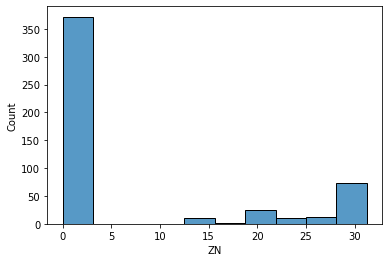

In [191]:
sns.histplot(df1["ZN"])

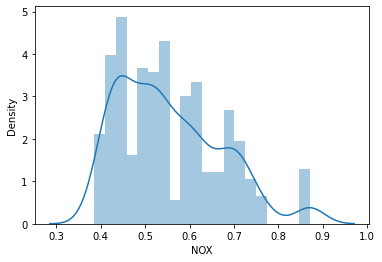

In [192]:
sns.distplot(df1["NOX"], bins = 20)

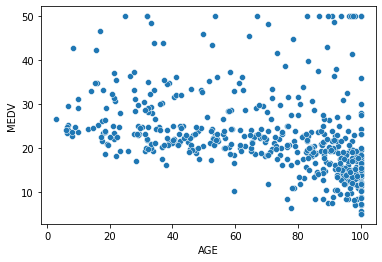

In [193]:
sns.scatterplot(df1["AGE"], df1["MEDV"])

In [194]:
# 1 --> New , 0 --> Old
df1["House_class"] = np.where(df1["AGE"] > 60, 0, 1)

In [195]:
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CRIM_grp,House_class
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1,1
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1,1


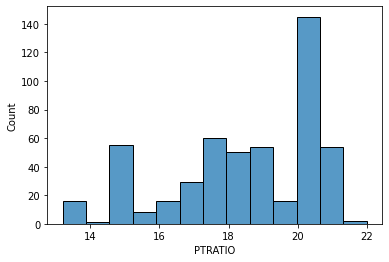

In [196]:
sns.histplot(df1["PTRATIO"])

In [197]:
df1["PTRATIO"].unique()

array([15.3, 17.8, 18.7, 15.2, 21. , 19.2, 18.3, 17.9, 16.8, 21.1, 17.3,
       15.1, 19.7, 18.6, 16.1, 18.9, 19. , 18.5, 18.2, 18. , 20.9, 19.1,
       21.2, 14.7, 16.6, 15.6, 14.4, 13.2, 17. , 16.4, 17.4, 15.9, 17.6,
       14.9, 13.6, 16. , 14.8, 18.4, 19.6, 16.9, 20.2, 15.5, 18.8, 22. ,
       20.1])

## TRANSFORMATIONS

In [198]:
from scipy.stats import boxcox

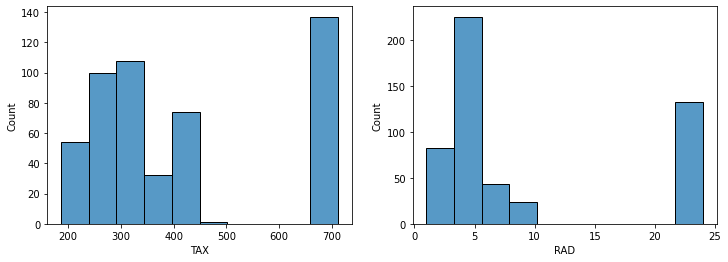

In [199]:
plt.figure(figsize = (12, 4))
plt.subplot(1,2,1)
sns.histplot(df1["TAX"])
plt.subplot(1,2,2)
sns.histplot(df1["RAD"])

In [200]:
df1 = df.copy()

Text(0.5, 1.0, 'RAD')

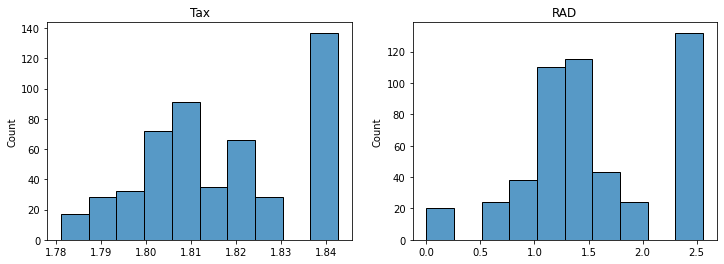

In [201]:
plt.figure(figsize = (12, 4))
plt.subplot(1,2,1)
sns.histplot(boxcox(df1["TAX"])[0])
plt.title("Tax")
plt.subplot(1,2,2)
sns.histplot(boxcox(df1["RAD"])[0])
plt.title("RAD")

In [202]:
df1["TAX"],_ = boxcox(df1['TAX'])

df1["RAD"],_ = boxcox(df1["RAD"])

## Target Transformation

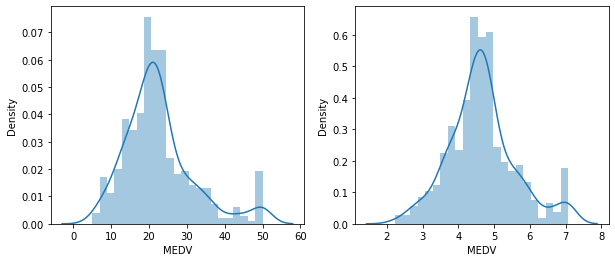

In [203]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df1["MEDV"])

plt.subplot(1,2,2)
sns.distplot(np.sqrt(df1["MEDV"]))

In [204]:
df1["MEDV"] = np.sqrt(df1["MEDV"])

In [206]:
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,0.000000,1.807258,15.3,396.90,4.98,4.898979
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,0.660260,1.796577,17.8,396.90,9.14,4.647580
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,0.660260,1.796577,17.8,392.83,4.03,5.890671
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,1.017528,1.791645,18.7,394.63,2.94,5.779273
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,1.017528,1.791645,18.7,396.90,5.33,6.016644


In [207]:
skew_info = df1.skew()
left_skew_cols = []
right_skew_cols = []
for col in df.columns:
    if skew_info[col]>0.5:
        right_skew_cols.append(col)
    if skew_info[col]<-0.5:
        left_skew_cols.append(col)

In [208]:
left_skew_cols

['AGE', 'PTRATIO', 'B']

In [209]:
right_skew_cols

['CRIM', 'ZN', 'CHAS', 'NOX', 'DIS', 'LSTAT']

* Still there are some columns which are skewed more than 0.5

## SPLITTING DATA 

In [213]:
X = df1.drop("MEDV", axis = 1)
y = df1["MEDV"]

In [214]:
ms1 = StandardScaler()

In [215]:
Xs1 = ms.fit_transform(X)

In [216]:
def scorer(model,X,y):
    r2scores = []
    maescores = []
    msescores = []
    rmse = []
    scores = pd.DataFrame()
    for train_index,test_index in kf.split(X):
        model.fit(X[train_index],y[train_index])
        y_pred = model.predict(X[test_index])
        y_test = y[test_index]
        y_test = y_test**2
        y_pred= y_pred**2
        r2scores.append(r2_score(y_test,y_pred))
        maescores.append(mean_absolute_error(y_test,y_pred))
        msescores.append(mean_squared_error(y_test,y_pred))
        rmse.append(np.sqrt(mean_squared_error(y_test,y_pred)))
        
    scores['r2_scores'] = r2scores
    scores['MAE_scores'] = maescores
    scores["MSE_scores"] = msescores
    scores['RMSE'] = rmse
        
    return scores

### LinearRegression

In [217]:
scorer(linear_regressor,Xs1,y)

,r2_scores,MAE_scores,MSE_scores,RMSE
0,0.743851,2.818047,17.937389,4.235255
1,0.728162,3.427781,24.662499,4.966135
2,0.810127,3.316644,20.473567,4.524773
3,0.708785,2.991118,19.514379,4.417508


### Lasso

In [218]:
scorer(lassoCV,Xs1,y)

,r2_scores,MAE_scores,MSE_scores,RMSE
0,0.743835,2.811766,17.938529,4.235390
1,0.728194,3.424831,24.659569,4.965840
2,0.810442,3.314957,20.439608,4.521018
3,0.709077,2.986375,19.494851,4.415297


### Ridge

In [219]:
scorer(ridgeCV,Xs1,y)

,r2_scores,MAE_scores,MSE_scores,RMSE
0,0.726106,2.750092,19.179984,4.379496
1,0.716962,3.360465,25.678612,5.067407
2,0.808672,3.322425,20.630472,4.542078
3,0.705301,2.913960,19.747830,4.443853


### elasticNet

In [220]:
scorer(elasticNetCV,Xs1,y)

,r2_scores,MAE_scores,MSE_scores,RMSE
0,0.743839,2.813887,17.938235,4.235355
1,0.728186,3.425061,24.660358,4.965920
2,0.810413,3.315096,20.442702,4.521361
3,0.709049,2.986755,19.496710,4.415508


#### The regression models have been improved siginficantly after transformation applied

### DecisionTree

In [221]:
scorer(dt,Xs1,y)

,r2_scores,MAE_scores,MSE_scores,RMSE
0,0.712259,2.887402,20.149685,4.488840
1,0.694979,3.174016,27.672992,5.260513
2,0.847997,2.969048,16.390079,4.048466
3,0.534184,3.385714,31.214444,5.586989


### XGBoosting

In [222]:
scorer(xgb,Xs1,y)

,r2_scores,MAE_scores,MSE_scores,RMSE
0,0.864663,2.050472,9.477274,3.078518
1,0.807674,2.540347,17.448822,4.177179
2,0.928240,2.069653,7.737707,2.781673
3,0.868593,2.096844,8.805604,2.967424


#### XGBoosting has given 0.928 for a split and the error rate is very minimized after transformation has been applied

### RandomForestRegressor

In [223]:
scorer(rf,Xs1,y)

,r2_scores,MAE_scores,MSE_scores,RMSE
0,0.857404,2.106553,9.985620,3.160003
1,0.828119,2.313897,15.593938,3.948916
2,0.906612,2.411576,10.069762,3.173289
3,0.860871,2.171344,9.323087,3.053373


### Gradient Boosting

In [224]:
scorer(gb,Xs1,y)

,r2_scores,MAE_scores,MSE_scores,RMSE
0,0.837518,2.247991,11.378147,3.373151
1,0.881424,2.126338,10.757826,3.279912
2,0.915220,2.215057,9.141570,3.023503
3,0.895277,1.932450,7.017501,2.649057


#### Gradient boosting also improved by 1% after transformation applied

### Light GBM

In [227]:
scorer(lgb,Xs1,y)

,r2_scores,MAE_scores,MSE_scores,RMSE
0,0.854507,2.044091,10.188437,3.191933
1,0.878462,2.135123,11.026504,3.320618
2,0.911955,2.327983,9.493726,3.081189
3,0.826216,2.192045,11.645341,3.412527


## Dimensionality Reduction

In [241]:
ds = df.copy()

In [242]:
from sklearn.decomposition import PCA
X = ds.iloc[:,:-1].values

In [243]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [244]:
cols = ["CRIM","ZN","INDUS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]

In [245]:
ds[cols] = scaler.fit_transform(ds[cols])

In [246]:
ds.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.576,0.067815,0.0,0.314815,0.608570,0.641607,0.340620,0.000000,0.208015,0.238636,1.000000,0.107500,24.0
1,0.000236,0.000,0.242302,0.0,0.172840,0.556402,0.782698,0.441539,0.043478,0.104962,0.522727,1.000000,0.245100,21.6
2,0.000236,0.000,0.242302,0.0,0.172840,0.815210,0.599382,0.441539,0.043478,0.104962,0.522727,0.989737,0.076077,34.7
3,0.000293,0.000,0.063050,0.0,0.150206,0.751863,0.441813,0.567540,0.086957,0.066794,0.625000,0.994276,0.040023,33.4
4,0.000705,0.000,0.063050,0.0,0.150206,0.802337,0.528321,0.567540,0.086957,0.066794,0.625000,1.000000,0.119077,36.2


In [267]:
pca = PCA(n_components = 7)
pca.fit(X)

pca_x = pca.fit_transform(X)

In [268]:
pca.explained_variance_ratio_.sum()

0.9996215415153527

In [269]:
pca_x

array([[-1.19896032e+02, -5.54915210e+00, -3.27826872e+00, ...,
        -2.14168029e+00, -5.17792579e+00, -1.55968840e-01],
       [-1.69303285e+02,  1.01222279e+01, -2.65663513e+01, ...,
         5.95709578e-01, -3.65177763e+00, -9.92846633e-01],
       [-1.69718288e+02,  1.40874591e+01, -8.98640763e+00, ...,
         3.35215149e-01, -6.55629439e+00,  1.18214915e+00],
       ...,
       [-1.38783727e+02,  9.45038969e-01, -3.55142806e+01, ...,
        -2.09555020e+00, -6.28843147e+00,  4.30910531e+00],
       [-1.37901064e+02,  4.25852693e+00, -3.39058615e+01, ...,
        -1.83509973e+00, -5.38169623e+00,  4.03973827e+00],
       [-1.39585606e+02,  1.01526301e+00, -2.60476762e+01, ...,
        -1.07814305e+00, -3.21507160e+00,  3.67410745e+00]])

In [270]:
scorer(xgb,pca_x,y)

,r2_scores,MAE_scores,MSE_scores,RMSE
0,0.734150,3.175494,18.616695,4.314707
1,0.711640,3.741439,26.161440,5.114825
2,0.778057,3.556713,23.931522,4.891986
3,0.605684,3.317909,26.423242,5.140354


After applying dimensionality reduction the variance ratio is 99% but the 
XGBoost model has not performed well compared to previous original data

In [272]:
#------------------------------------------------------------------------------------------------------------------------------#

In [95]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [96]:
for i in range(3,11):
    kmeans = KMeans(init = "random", n_clusters = i, n_init = 5, max_iter = 300, random_state = 42)
    kmeans.fit(pca_x)
    print(i,"-")
    print(kmeans.inertia_)

3 -
4239786.89345198
4 -
3930302.7678166027
5 -
1285479.0444621504
6 -
1151001.1588406484
7 -
1108608.8754976182
8 -
766064.3927951896
9 -
655288.3591649445
10 -
607548.8471048407


In [97]:
kmeans_kwargs = KMeans(n_init = 5, max_iter = 300, random_state = 42)

In [101]:
sse = []
for k in range(1,11):
    kmeans = KMeans() 
    kmeans.fit(pca_x)
    sse.append(kmeans.inertia_)

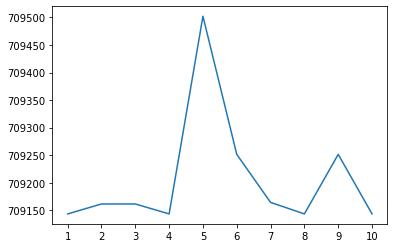

In [102]:
plt.plot(range(1,11),sse)
plt.xticks(range(1,11))
plt.show()

In [162]:
kmeans = KMeans(init = "random", n_clusters = 3, n_init = 5, max_iter = 300, random_state = 42)
kmeans.fit(pca_x)
print(kmeans.inertia_)

1741.8897080610916


In [163]:
feature_kmeans = kmeans.predict(pca_x)

In [164]:
feature_kmeans

array([0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0,

In [165]:
ds['K_means'] = feature_kmeans

In [166]:
ds.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,K_means
0,-0.419782,0.918420,-1.287909,0.0,-0.144217,0.475982,-0.120013,0.148015,-0.982843,-0.666608,-1.477181,0.441052,-1.088749,24.0,0
1,-0.417339,-0.579471,-0.593381,0.0,-0.740262,0.231390,0.367166,0.572202,-0.867883,-0.987329,-0.309941,0.441052,-0.495302,21.6,2
2,-0.417342,-0.579471,-0.593381,0.0,-0.740262,1.444822,-0.265812,0.572202,-0.867883,-0.987329,-0.309941,0.396427,-1.224272,34.7,0
3,-0.416750,-0.579471,-1.306878,0.0,-0.835284,1.147817,-0.809889,1.101820,-0.752922,-1.106115,0.110265,0.416163,-1.379766,33.4,0
4,-0.412482,-0.579471,-1.306878,0.0,-0.835284,1.384468,-0.511180,1.101820,-0.752922,-1.106115,0.110265,0.441052,-1.038819,36.2,0


In [167]:
dum = pd.get_dummies(ds['K_means'],drop_first=True,prefix="K_means")
ds = pd.concat([ds.drop('K_means',axis=1),dum],axis=1)

In [168]:
df2 = pd.concat([df1,dum],axis=1)

In [169]:
ds.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,K_means_1,K_means_2
0,-0.419782,0.918420,-1.287909,0.0,-0.144217,0.475982,-0.120013,0.148015,-0.982843,-0.666608,-1.477181,0.441052,-1.088749,24.0,0,0
1,-0.417339,-0.579471,-0.593381,0.0,-0.740262,0.231390,0.367166,0.572202,-0.867883,-0.987329,-0.309941,0.441052,-0.495302,21.6,0,1
2,-0.417342,-0.579471,-0.593381,0.0,-0.740262,1.444822,-0.265812,0.572202,-0.867883,-0.987329,-0.309941,0.396427,-1.224272,34.7,0,0
3,-0.416750,-0.579471,-1.306878,0.0,-0.835284,1.147817,-0.809889,1.101820,-0.752922,-1.106115,0.110265,0.416163,-1.379766,33.4,0,0
4,-0.412482,-0.579471,-1.306878,0.0,-0.835284,1.384468,-0.511180,1.101820,-0.752922,-1.106115,0.110265,0.441052,-1.038819,36.2,0,0


In [170]:
# Hierarchical

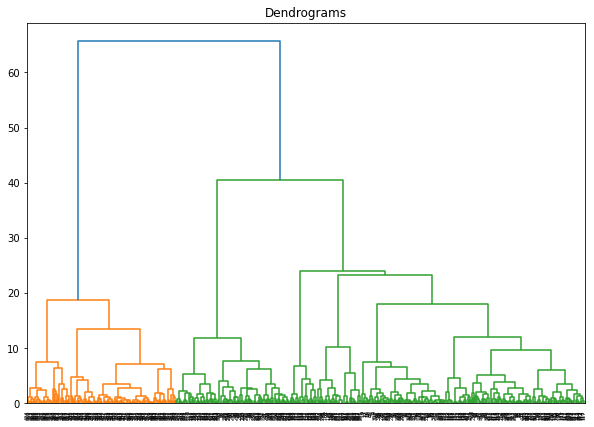

In [171]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(pca_x, method='ward'))

In [103]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
feature_hierarichal = cluster.fit_predict(X)

In [104]:
ds['Hiearchical'] = feature_hierarichal

In [105]:
ds

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Hiearchical
0,-0.419782,0.918420,-1.287909,0.0,-0.144217,0.475982,-0.120013,0.148015,-0.982843,-0.666608,-1.477181,0.441052,-1.088749,24.0,0
1,-0.417339,-0.579471,-0.593381,0.0,-0.740262,0.231390,0.367166,0.572202,-0.867883,-0.987329,-0.309941,0.441052,-0.495302,21.6,0
2,-0.417342,-0.579471,-0.593381,0.0,-0.740262,1.444822,-0.265812,0.572202,-0.867883,-0.987329,-0.309941,0.396427,-1.224272,34.7,0
3,-0.416750,-0.579471,-1.306878,0.0,-0.835284,1.147817,-0.809889,1.101820,-0.752922,-1.106115,0.110265,0.416163,-1.379766,33.4,0
4,-0.412482,-0.579471,-1.306878,0.0,-0.835284,1.384468,-0.511180,1.101820,-0.752922,-1.106115,0.110265,0.441052,-1.038819,36.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.579471,0.115738,0.0,0.158124,0.504571,0.018673,-0.631298,-0.982843,-0.803212,1.184126,0.387217,-0.419694,22.4,0
502,-0.415249,-0.579471,0.115738,0.0,0.158124,-0.246676,0.288933,-0.723719,-0.982843,-0.803212,1.184126,0.441052,-0.503861,20.6,0
503,-0.413447,-0.579471,0.115738,0.0,0.158124,1.112875,0.797449,-0.781754,-0.982843,-0.803212,1.184126,0.441052,-0.994596,23.9,0
504,-0.407764,-0.579471,0.115738,0.0,0.158124,0.823812,0.736996,-0.674679,-0.982843,-0.803212,1.184126,0.403225,-0.874765,22.0,0


In [106]:
dum = pd.get_dummies(ds['Hiearchical'],drop_first=True,prefix="Hierarchical")
ds = pd.concat([ds.drop('Hiearchical',axis=1),dum],axis=1)

In [107]:
df2 = pd.concat([df2,dum],axis=1)

NameError: name 'df2' is not defined

In [177]:
ds.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,K_means_1,K_means_2,Hierarchical_1,Hierarchical_2
0,-0.419782,0.918420,-1.287909,0.0,-0.144217,0.475982,-0.120013,0.148015,-0.982843,-0.666608,-1.477181,0.441052,-1.088749,24.0,0,0,0,1
1,-0.417339,-0.579471,-0.593381,0.0,-0.740262,0.231390,0.367166,0.572202,-0.867883,-0.987329,-0.309941,0.441052,-0.495302,21.6,0,1,0,0
2,-0.417342,-0.579471,-0.593381,0.0,-0.740262,1.444822,-0.265812,0.572202,-0.867883,-0.987329,-0.309941,0.396427,-1.224272,34.7,0,0,0,0
3,-0.416750,-0.579471,-1.306878,0.0,-0.835284,1.147817,-0.809889,1.101820,-0.752922,-1.106115,0.110265,0.416163,-1.379766,33.4,0,0,0,0
4,-0.412482,-0.579471,-1.306878,0.0,-0.835284,1.384468,-0.511180,1.101820,-0.752922,-1.106115,0.110265,0.441052,-1.038819,36.2,0,0,0,0


In [178]:
df2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,K_means_1,K_means_2,Hierarchical_1,Hierarchical_2
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,0.000000,1.807258,15.3,396.90,4.98,4.898979,0,0,0,1
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,0.660260,1.796577,17.8,396.90,9.14,4.647580,0,1,0,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,0.660260,1.796577,17.8,392.83,4.03,5.890671,0,0,0,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,1.017528,1.791645,18.7,394.63,2.94,5.779273,0,0,0,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,1.017528,1.791645,18.7,396.90,5.33,6.016644,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,0.000000,1.803104,21.0,391.99,9.67,4.732864,0,1,0,0
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,0.000000,1.803104,21.0,396.90,9.08,4.538722,0,1,0,0
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,0.000000,1.803104,21.0,396.90,5.64,4.888763,0,1,0,0
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,0.000000,1.803104,21.0,393.45,6.48,4.690416,0,1,0,0


In [179]:
X = df2.drop("MEDV", axis = 1)
y = df2["MEDV"]

In [180]:
sc2 = StandardScaler()

In [181]:
Xs2 = sc2.fit_transform(X)

In [184]:
scorer(linear_regressor,Xs2,y)

,r2_scores,MAE_scores,MSE_scores,RMSE
0,0.761548,2.948848,17.936823,4.235189
1,0.754678,3.288859,23.370682,4.834323
2,0.764274,3.127063,19.161416,4.377375


In [185]:
scorer(lassoCV,Xs2,y)

,r2_scores,MAE_scores,MSE_scores,RMSE
0,0.762409,2.937938,17.872067,4.227537
1,0.754887,3.276908,23.350719,4.832258
2,0.764184,3.123019,19.168760,4.378214


In [186]:
scorer(ridgeCV,Xs2,y)

,r2_scores,MAE_scores,MSE_scores,RMSE
0,0.733979,2.948814,20.010594,4.473320
1,0.738136,3.228214,24.946534,4.994651
2,0.764361,3.121519,19.154407,4.376575


In [187]:
scorer(dt,Xs2,y)

,r2_scores,MAE_scores,MSE_scores,RMSE
0,0.690867,3.060947,23.253550,4.822194
1,0.763410,3.171598,22.538817,4.747506
2,0.814148,2.806548,15.107321,3.886814


In [188]:
scorer(rf,Xs2,y)

,r2_scores,MAE_scores,MSE_scores,RMSE
0,0.864843,2.134750,10.166795,3.188541
1,0.832980,2.509107,15.911200,3.988885
2,0.882444,2.210457,9.555798,3.091245


In [189]:
scorer(xgb,Xs2,y)

,r2_scores,MAE_scores,MSE_scores,RMSE
0,0.875672,2.117349,9.352206,3.058138
1,0.806102,2.726298,18.471756,4.297878
2,0.890527,2.108841,8.898746,2.983077


In [190]:
scorer(gb,Xs2,y)

,r2_scores,MAE_scores,MSE_scores,RMSE
0,0.867636,2.157918,9.956677,3.155420
1,0.874091,2.270791,11.994793,3.463350
2,0.899628,2.104888,8.158920,2.856382


In [191]:
feature_imp = pd.Series(rf.feature_importances_,X.columns).sort_values(ascending=False)

In [193]:
feature_imp

LSTAT             0.581287
RM                0.199945
CRIM              0.062961
NOX               0.045205
DIS               0.037743
TAX               0.017922
B                 0.014790
AGE               0.013140
PTRATIO           0.011351
INDUS             0.008447
RAD               0.002742
K_means_1         0.001627
CHAS              0.000848
Hierarchical_1    0.000719
K_means_2         0.000622
ZN                0.000505
Hierarchical_2    0.000143
dtype: float64

In [194]:
rf.feature_importances_

array([6.29609417e-02, 5.04909758e-04, 8.44736482e-03, 8.48495827e-04,
       4.52053993e-02, 1.99945187e-01, 1.31404412e-02, 3.77425149e-02,
       2.74218540e-03, 1.79224504e-02, 1.13514343e-02, 1.47903995e-02,
       5.81287494e-01, 1.62657784e-03, 6.22170585e-04, 7.19284298e-04,
       1.42749858e-04])

<AxesSubplot:>

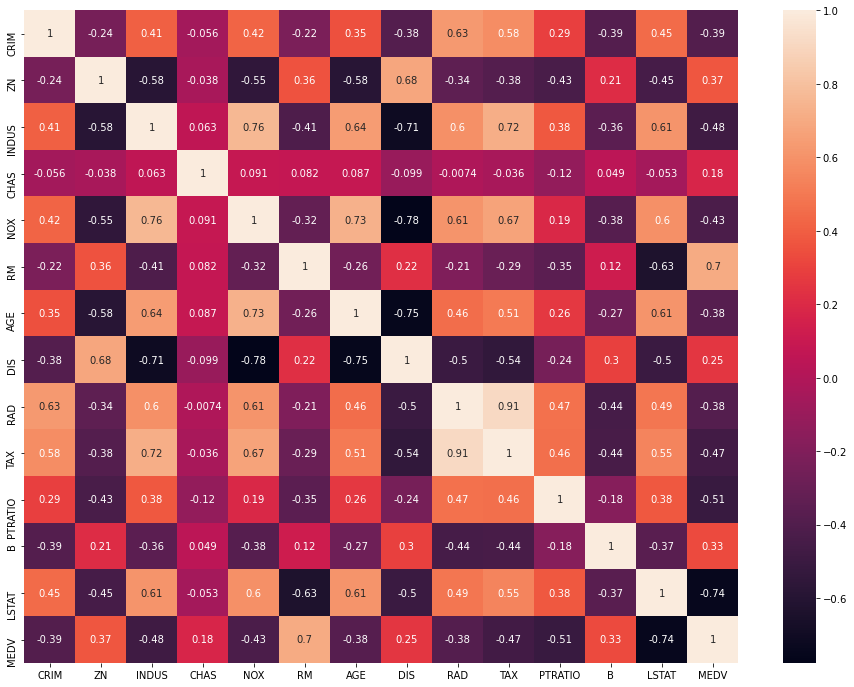

In [195]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),annot=True)

# Feature Selection

In [196]:
sc3 = StandardScaler()
X = df2.drop("MEDV", axis = 1)

In [197]:
X_trans = sc3.fit_transform(X)

In [198]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [199]:
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [200]:
kf2 = KFold(n_splits=3, random_state=42, shuffle=True)

Feature 0: 0.327394
Feature 1: 0.140530
Feature 2: 0.460816
Feature 3: 0.042563
Feature 4: 0.404547
Feature 5: 0.530711
Feature 6: 0.282332
Feature 7: 0.277690
Feature 8: 0.238200
Feature 9: 0.362601
Feature 10: 0.469641
Feature 11: 0.132400
Feature 12: 0.749765
Feature 13: 0.228603
Feature 14: 0.040466
Feature 15: 0.198610
Feature 16: 0.090960


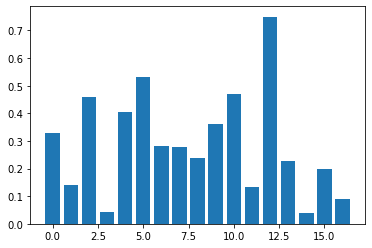

Feature 0: 0.285141
Feature 1: 0.151541
Feature 2: 0.422025
Feature 3: 0.000000
Feature 4: 0.326983
Feature 5: 0.443649
Feature 6: 0.380847
Feature 7: 0.276869
Feature 8: 0.183071
Feature 9: 0.308231
Feature 10: 0.370643
Feature 11: 0.118888
Feature 12: 0.656041
Feature 13: 0.180907
Feature 14: 0.052369
Feature 15: 0.169275
Feature 16: 0.102603


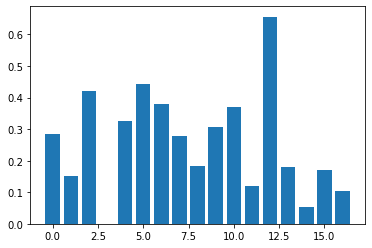

Feature 0: 0.373316
Feature 1: 0.142402
Feature 2: 0.445610
Feature 3: 0.025401
Feature 4: 0.505846
Feature 5: 0.590398
Feature 6: 0.257350
Feature 7: 0.304844
Feature 8: 0.249746
Feature 9: 0.360559
Feature 10: 0.466863
Feature 11: 0.158283
Feature 12: 0.696343
Feature 13: 0.213366
Feature 14: 0.061080
Feature 15: 0.184563
Feature 16: 0.100750


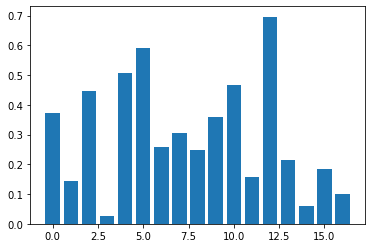

In [201]:
for train, test in kf2.split(X_trans):
    X_train_fs, X_test_fs, fs = select_features(X_trans[train], y[train], X_trans[test])
    for i in range(len(fs.scores_)):
        print('Feature %d: %f' % (i, fs.scores_[i]))
    # plot the scores
    plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
    plt.show()

In [202]:
df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,K_means_1,K_means_2,Hierarchical_1,Hierarchical_2
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,0.000000,1.807258,15.3,396.90,4.98,4.898979,0,0,0,1
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,0.660260,1.796577,17.8,396.90,9.14,4.647580,0,1,0,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,0.660260,1.796577,17.8,392.83,4.03,5.890671,0,0,0,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,1.017528,1.791645,18.7,394.63,2.94,5.779273,0,0,0,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,1.017528,1.791645,18.7,396.90,5.33,6.016644,0,0,0,0


In [203]:
from sklearn.decomposition import PCA

In [204]:
pca2 = PCA(n_components=5,random_state = 0)

In [205]:
pca2.fit(X_trans)

PCA(n_components=5, random_state=0)

In [206]:
pca2.explained_variance_ratio_

array([0.46180116, 0.1588908 , 0.07683118, 0.0549729 , 0.05228146])

In [207]:
Xpca = pca.fit_transform(X_trans)

In [208]:
scorer(gb, Xpca, df2.MEDV)

,r2_scores,MAE_scores,MSE_scores,RMSE
0,0.711093,2.966558,21.732116,4.661772
1,0.651897,3.761417,33.162149,5.758659
2,0.722796,3.206491,22.533076,4.746902


In [209]:
selected_features = ["CRIM", "INDUS", "RM","DIS", "AGE", "TAX", "PTRATIO", "LSTAT"]

<AxesSubplot:>

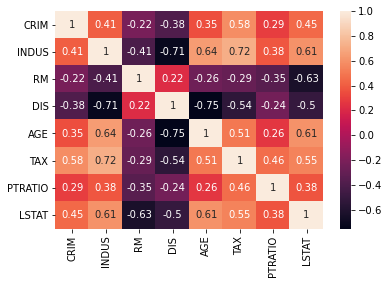

In [210]:
sns.heatmap(df[selected_features].corr(), annot = True)

In [211]:
selected_X = df2[selected_features].values

In [212]:
selected_X

array([[6.32000000e-03, 2.31000000e+00, 6.57500000e+00, ...,
        1.80725765e+00, 1.53000000e+01, 4.98000000e+00],
       [2.73100000e-02, 7.07000000e+00, 6.42100000e+00, ...,
        1.79657673e+00, 1.78000000e+01, 9.14000000e+00],
       [2.72900000e-02, 7.07000000e+00, 7.18500000e+00, ...,
        1.79657673e+00, 1.78000000e+01, 4.03000000e+00],
       ...,
       [6.07600000e-02, 1.19300000e+01, 6.97600000e+00, ...,
        1.80310371e+00, 2.10000000e+01, 5.64000000e+00],
       [1.09590000e-01, 1.19300000e+01, 6.79400000e+00, ...,
        1.80310371e+00, 2.10000000e+01, 6.48000000e+00],
       [4.74100000e-02, 1.19300000e+01, 6.03000000e+00, ...,
        1.80310371e+00, 2.10000000e+01, 7.88000000e+00]])

In [213]:
scorer(linear_regressor, selected_X, y)

,r2_scores,MAE_scores,MSE_scores,RMSE
0,0.739223,3.031365,19.616161,4.429014
1,0.717001,3.388632,26.959954,5.192298
2,0.740955,3.190554,21.056999,4.588791


In [214]:
scorer(lassoCV, selected_X, y)

,r2_scores,MAE_scores,MSE_scores,RMSE
0,0.732895,3.079975,20.092115,4.482423
1,0.716994,3.389900,26.960648,5.192364
2,0.742439,3.180818,20.936378,4.575629


In [215]:
scorer(gb, selected_X, y)

,r2_scores,MAE_scores,MSE_scores,RMSE
0,0.851531,2.279007,11.168117,3.341873
1,0.855874,2.569759,13.730182,3.705426
2,0.891885,2.191258,8.788351,2.964515


In [216]:
scorer(xgb, selected_X, y)

,r2_scores,MAE_scores,MSE_scores,RMSE
0,0.849072,2.281049,11.353054,3.369429
1,0.778643,2.831775,21.087637,4.592128
2,0.891739,2.206797,8.800211,2.966515


In [217]:
scorer(rf, selected_X, y)

,r2_scores,MAE_scores,MSE_scores,RMSE
0,0.846035,2.254699,11.581564,3.403170
1,0.828042,2.588001,16.381634,4.047423
2,0.873498,2.312233,10.282978,3.206708


## Hyper parameter tuning

In [219]:
from sklearn.model_selection import GridSearchCV

In [220]:
par = {
    'n_estimators':[500,600,800,1000],
    'min_samples_split':range(2,10),
    'max_depth' : [3,4,5,6,7,8]
}

In [221]:
gb = GradientBoostingRegressor()

In [222]:
gb = GradientBoostingRegressor(max_depth=4,min_samples_split=6 ,n_estimators=800,random_state=3)

In [223]:
reg = GridSearchCV(gb,param_grid=par,n_jobs=-1)

In [224]:
scorer(gb,Xs,y)

,r2_scores,MAE_scores,MSE_scores,RMSE
0,0.878349,2.089113,9.150831,3.025034
1,0.866313,2.371404,12.735735,3.568716
2,0.910757,2.051018,7.254290,2.693379


In [225]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Xs1,y,test_size=0.2)

In [ ]:
reg.fit(X_train,y_train)

In [1203]:
reg.best_params_

{'max_depth': 4, 'min_samples_split': 6, 'n_estimators': 800}

In [264]:
# create a list of base-models
def get_models():
    models = list()
    models.append(LGBMRegressor())
    models.append(XGBRegressor())
    models.append(RandomForestRegressor(n_estimators=800))
    models.append(GradientBoostingRegressor(max_depth=4, min_impurity_split=6, n_estimators=800, random_state=3))
    models.append(DecisionTreeRegressor())
    return models

In [265]:

def get_out_of_fold_predictions(X, y, models):
    meta_X, meta_y = list(), list()
    kfold = KFold(n_splits=3, shuffle=True)
    for train_ix, test_ix in kfold.split(X):
        fold_yhats = list()
        train_X, test_X = X.iloc[train_ix], X.iloc[test_ix]
        train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]
        meta_y.extend(test_y)
        for model in models:
            model.fit(train_X, train_y)
            yhat = model.predict(test_X)
            fold_yhats.append(yhat.reshape(len(yhat),1))
        meta_X.append(hstack(fold_yhats))
    return vstack(meta_X), asarray(meta_y)

In [266]:
def fit_base_models(X, y, models):
    for model in models:
        model.fit(X, y)

In [312]:
def fit_meta_model(X, y):
    model = GradientBoostingRegressor(random_state=3)
    model.fit(X, y)
    return model


In [313]:
def evaluate_models(X, y, models):
    for model in models:
        yhat = model.predict(X)
        mse = mean_squared_error(y, yhat)

In [314]:
def super_learner_predictions(X, models, meta_model):
    meta_X = list()
    for model in models:
        yhat = model.predict(X)
        meta_X.append(yhat.reshape(len(yhat),1))
    meta_X = hstack(meta_X)
    # predict
    return meta_model.predict(meta_X)

In [315]:
import sklearn

In [316]:
sklearn.__version__

'0.24.1'

In [317]:
from sklearn.model_selection import train_test_split
from math import sqrt
from numpy import hstack
from numpy import vstack
from numpy import asarray

X_train, X_test, y_train, y_test = train_test_split(df2.drop("MEDV", axis=1), df2["MEDV"], test_size=0.2, random_state = 42)
models = get_models()
meta_X, meta_y = get_out_of_fold_predictions(X_train, y_train, models)
fit_base_models(X_train, y_train, models)
meta_model = fit_meta_model(meta_X, meta_y)
evaluate_models(X_test, y_test, models)
y_pred = super_learner_predictions(X_test, models, meta_model)

In [318]:
print(r2_score(y_pred, y_test))
print(mean_absolute_error(y_pred, y_test))
print(mean_squared_error(y_pred, y_test))
print(np.sqrt(mean_squared_error(y_pred, y_test)))

0.8489034553715189
0.22524701629923505
0.10595602800493377
0.32550887546261126
